In [1]:
import pandas as pd

df=pd.read_csv("c:/data/pima/data.csv")
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df["outcome"].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [3]:
train_cols=df.columns[0:8]
X=df[train_cols]
y=df["outcome"]

In [4]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['outcome'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [5]:
df_samp["outcome"].value_counts()

0    268
1    268
Name: outcome, dtype: int64

In [6]:
X=df_samp[train_cols]
y=df_samp["outcome"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [8]:
from sklearn.ensemble import AdaBoostClassifier

model_ada=AdaBoostClassifier(n_estimators=100, random_state=0)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [9]:
print(model_ada.predict(X_test))
print(model_ada.score(X_train,y_train))
print(model_ada.score(X_test,y_test))

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1]
0.8761682242990654
0.6944444444444444


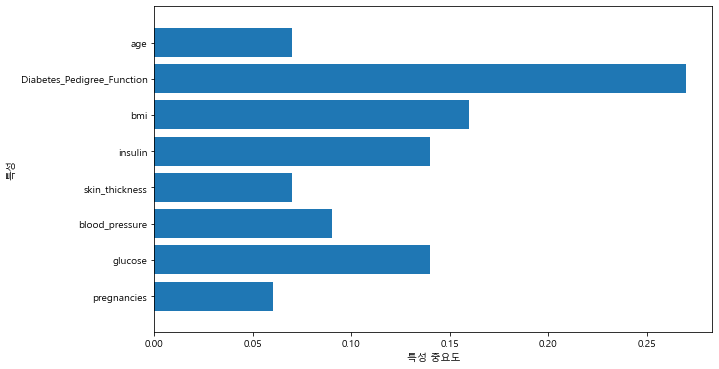

In [10]:
import numpy as np
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def plot_tree(model):
    plt.figure(figsize=(10,6))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_tree(model_ada)

In [11]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
model_svc=AdaBoostClassifier(algorithm='SAMME',n_estimators=50,base_estimator=svc)
model_svc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(kernel='linear', probability=True))

In [12]:
print(model_svc.predict(X_test))
print(model_svc.score(X_train, y_train))
print(model_svc.score(X_test, y_test))

[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.7429906542056075
0.6851851851851852


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=0)

In [14]:
model_grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [15]:
print(model_grad.predict(X_test))
print(model_grad.score(X_train, y_train))
print(model_grad.score(X_test, y_test))

[0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1]
0.9228971962616822
0.75


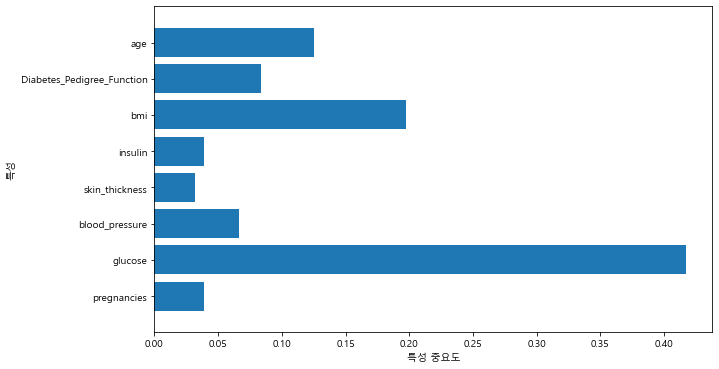

In [16]:
plot_tree(model_grad)

In [17]:
import xgboost

model_xgb=xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=0)

In [18]:
model_xgb.fit(X_train,y_train)

[12:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
print(model_xgb.predict(X_test))
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))

[0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1]
0.9976635514018691
0.75


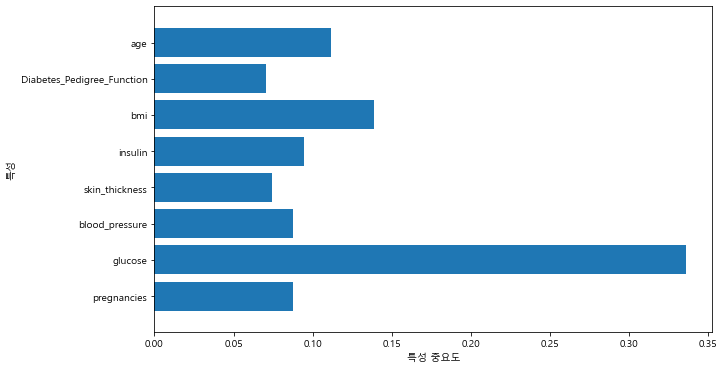

In [20]:
plot_tree(model_xgb)

In [21]:
import lightgbm
model_lgbm = lightgbm.LGBMClassifier(n_estimators=100, max_depth=3, random_state=0)

In [22]:
model_lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=0)

In [23]:
print(model_lgbm.predict(X_test))
print(model_lgbm.score(X_train, y_train))
print(model_lgbm.score(X_test, y_test))

[0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1]
0.8995327102803738
0.7685185185185185


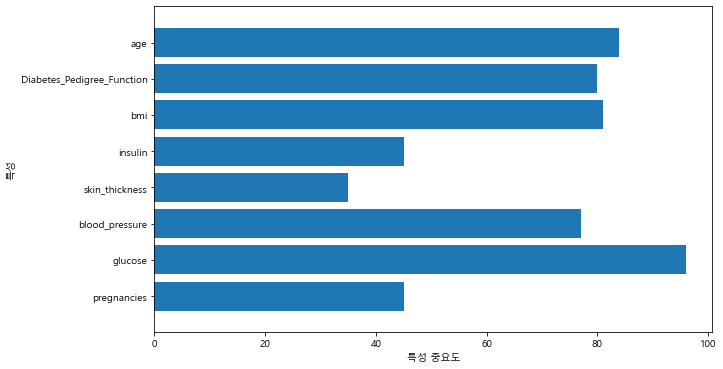

In [24]:
plot_tree(model_lgbm)